In [58]:
import json
from matplotlib import pyplot as plt
from matplotlib import colormaps
import os
from PIL import Image

%matplotlib ipympl
# %matplotlib inline

/tmp/ipykernel_14038/2918241140.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(label['x'], label['y'], s = 1, c = color_dict[label['label']], label=label['label'])


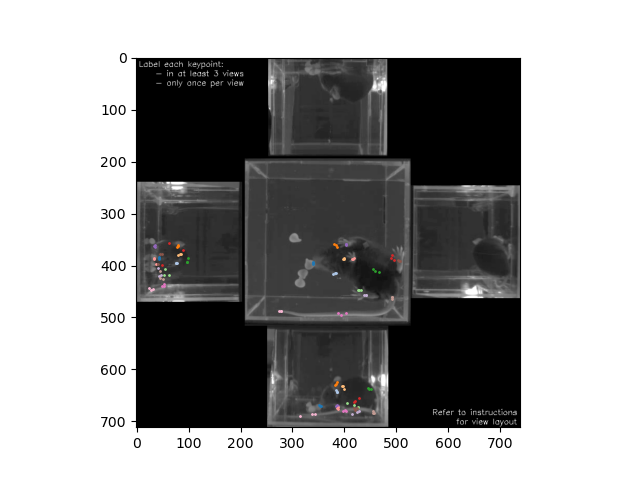

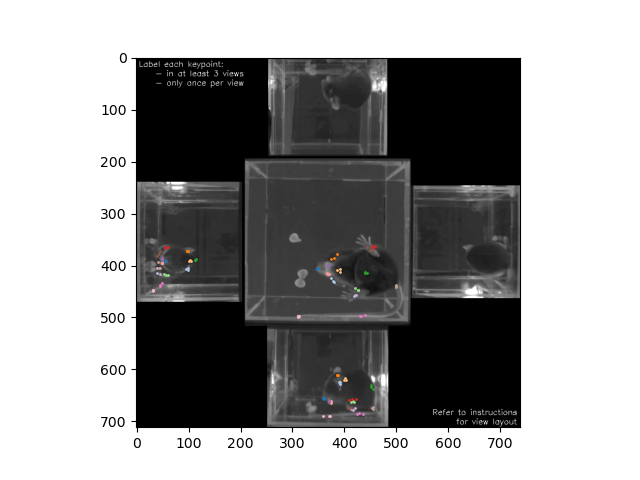

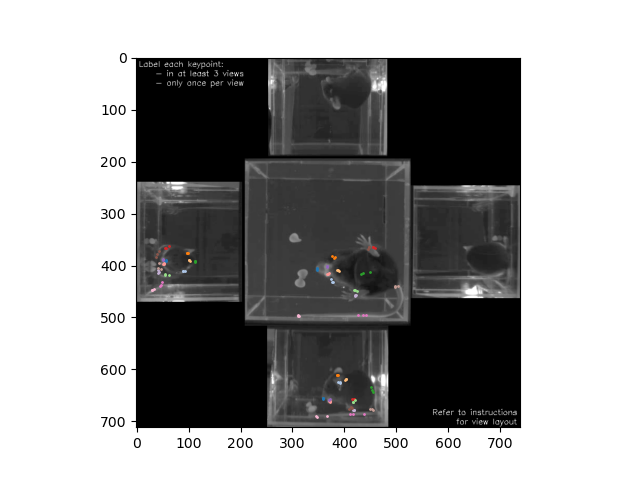

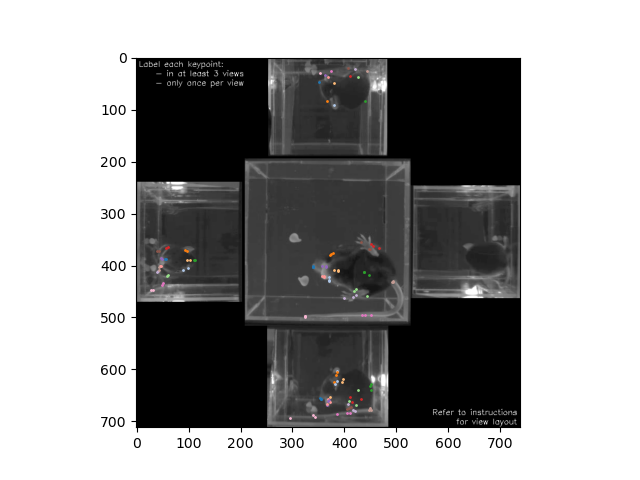

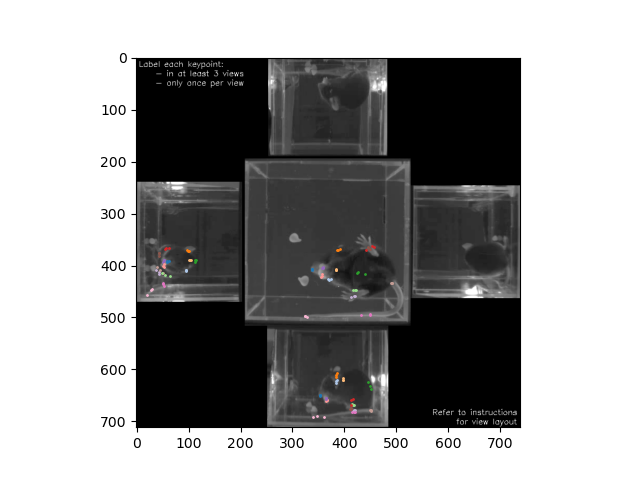

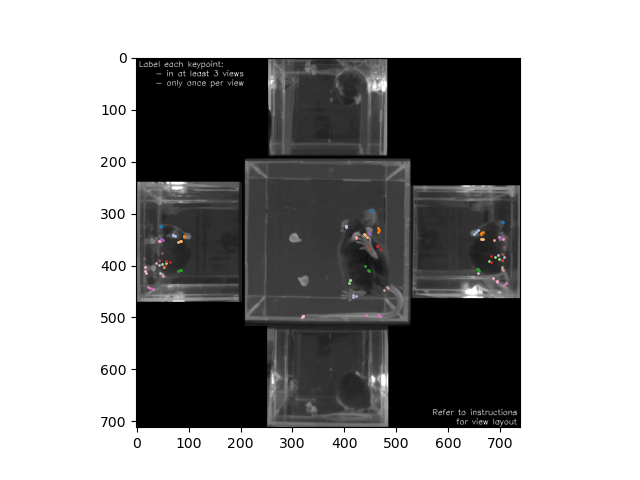

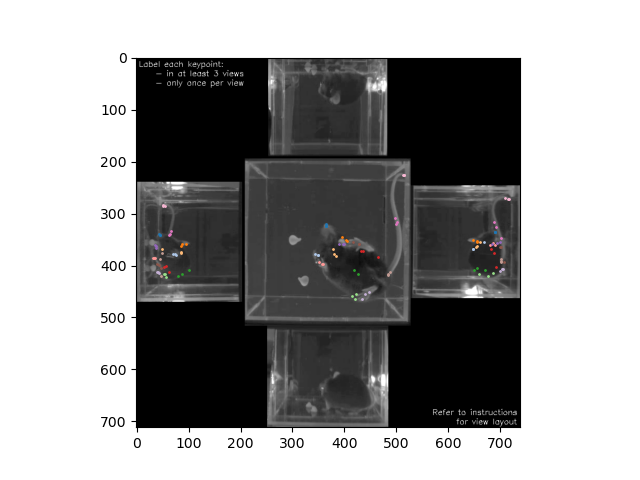

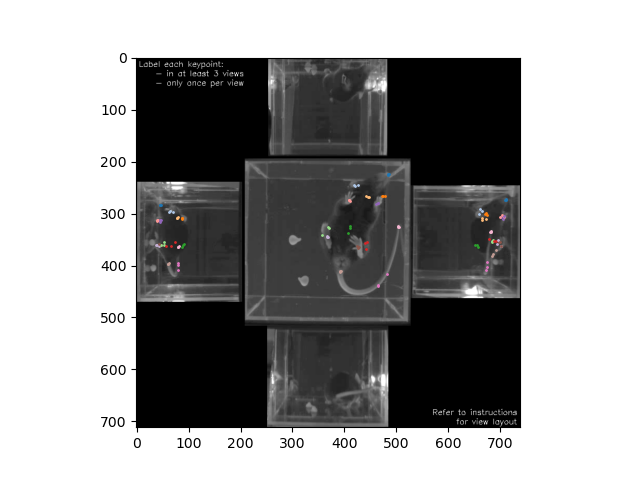

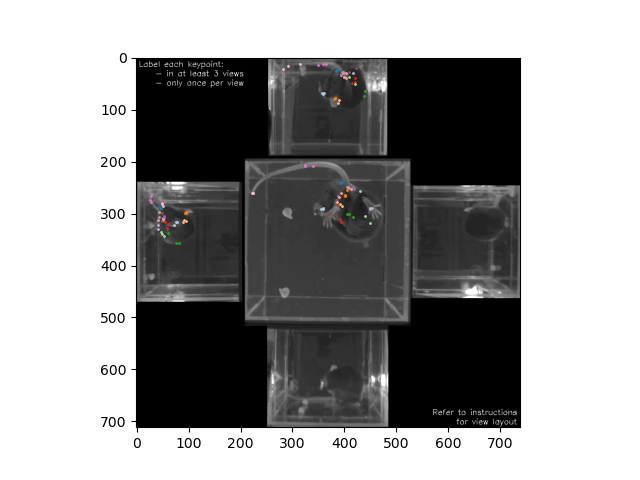

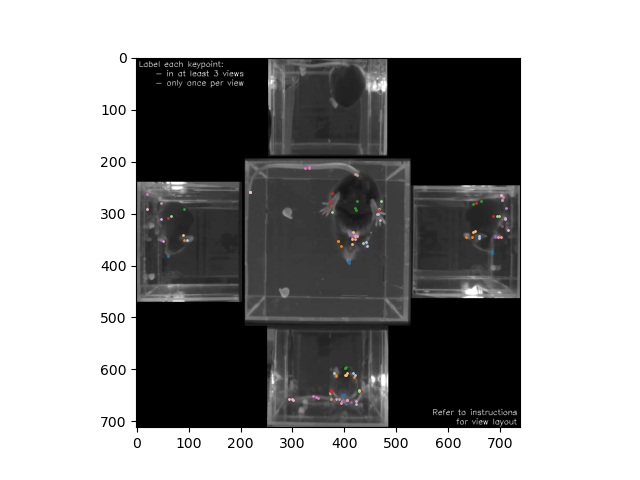

In [74]:
image_dir = '/home/klb807/MARS_project/3d/annotation_data/raw_images'
fid = open('/home/klb807/MARS_project/3d/annotation_data/output.manifest')

labels = ['Nose','Right Ear','Left Ear', 'Throat', 'Spine Center', 'Right Hip', 'Left Hip', 'Right Front Paw', 'Left Front Paw', 'Right Rear Paw', 'Left Rear Paw', 'Tail Base', 'Tail Middle', 'Tail Tip']
cmap = colormaps['tab20'].colors

color_dict = {labels[ii]:cmap[ii] for ii in range(len(labels))}


# fig,ax = plt.subplots(ncols=3, nrows=4)
for i_line,line in enumerate(fid.readlines()):
    fig,ax = plt.subplots()
    # set up image file path
    image_path = os.path.join(image_dir,os.path.split(json.loads(line)['source-ref'])[-1])
    
    # pull out the keypoints
    im_array = Image.open(image_path)
    # ax[i_line//3,i_line%3].imshow(im_array)
    ax.imshow(im_array)
    

    data = json.loads(line)['test-3d-data-20240213']
    for worker_label in data['annotationsFromAllWorkers']:
        # print(worker_label['annotationData']['content']['annotatedResult'])
        sub_data = eval(worker_label['annotationData']['content'])
        for label in sub_data['annotatedResult']['keypoints']:
            ax.scatter(label['x'], label['y'], s = 1, c = color_dict[label['label']], label=label['label'])

        # ax.legend()
            
    fig.savefig(os.path.splitext(image_path)[0] + '_labeled.png', dpi=300)


fid.close()